# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Febrian Nashrullah
- **Email:** febrian031318@gmail.com
- **ID Dicoding:** febrian_ainss

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda setiap bulan selama tahun 2011 sampai 2012?
- Bagaimana pengaruh registered dengan rate sewa sepeda?
- Pada jam berapa umumnya penyewaan sepeda paling banyak?
- Pada jam berapa baiknya perawatan harian sepeda dilakukan agar tidak mengganggu pelanggan?

## Import Semua Packages/Library yang Digunakan

In [153]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [154]:
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

In [155]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [156]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kedua data memiliki column yang sama, kecuali pada hour terdapat kolom hr yang menunjukkan per jam
- Data hour merupakan penjabaran lebih detai dari day

### Assessing Data

Mengganti nama beberapa column agar lebih mudah dipahami

Mengganti nama beberapa column agar lebih mudah dipahami

In [157]:
day_df.info()
day_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Data day_df memiliki Dtype yang aman dan terisi semua (tidak ada null)

In [158]:
print("Duplicated data count: ", day_df.duplicated().sum())

Duplicated data count:  0


In [159]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Terlihat data aman dari nilai mencurigakan, semua nilai sesuai dengan README pada dataset

Menilai data hour

In [160]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [161]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada data yang kosong

In [162]:
print("Duplicated data count: ", hour_df.duplicated().sum())

Duplicated data count:  0


Tidak ada data duplikasi

In [163]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak ada data yang salah, semua sesuaai dengan keterangan dataset

**Insight:**
- Tidak ada missing values, abnormal values, atau wrong datatype pada day.csv
- Tidak ada missing values, abnormal values, atau wrong datatype pada hour.csv
- Beberapa nama column perlu diubah agar lebih mudah dimengerti
- Pada column 'yr' (year), terisi '0' dan '1' yang perlu diubah menjadi '2011' dan '2012' agar merepresentasikan tahun yang sebenarnya

### Cleaning Data

Tidak ada Outlier, duplikasi, missing values 


Akan diubah nama beberapa column agar mudah dimengerti

In [164]:
day_df.rename(columns={'instant': 'id', 'dteday': 'date', 'yr': 'year', 'mnth': 'month','hum':'humidity', 'temp': 'temperature', 'cnt': 'rented', 'weathersit': 'weather'},inplace=True)

In [165]:
hour_df.rename(columns={'instant': 'id', 'dteday': 'date', 'yr': 'year', 'mnth': 'month','hum':'humidity', 'temp': 'temperature', 'cnt': 'rented', 'hr': 'hour', 'weathersit': 'weather'},inplace=True)

Akan diubah kolom 'year', sebelumnya '0' dan '1' menjadi '2011' an '2012' untuk memudahkan mengerti  

In [166]:
day_df['year'] = day_df['year'].replace({0: 2011, 1: 2012})
hour_df['year'] = hour_df['year'].replace({0: 2011, 1: 2012})

Akan diubah kolom 'month' sebelumnya '1-12' menjadi nama-nama bulan agar memudahkan untuk dimengerti

Akan didbuat file CSV dari data yang sudah direvisi

In [167]:
day_df.to_csv('rev_day.csv', index=False)
hour_df.to_csv('rev_hour.csv', index=False)

**Insight:**
- Data sudah siap digunakan untuk analisis selanjutnya


## Exploratory Data Analysis (EDA)

### Explore Parameter Statistik

**Kalkulasi rata-rata sewa per bulan selama 2011 sampai 2012**

In [168]:
pivot_RentperMonth_2011 = day_df[day_df['year']==2011].groupby(by=['year', 'month']).agg(
    {
        'rented': 'mean',
        
    }
).reset_index()
print(pivot_RentperMonth_2011)


    year  month       rented
0   2011      1  1231.903226
1   2011      2  1721.964286
2   2011      3  2065.967742
3   2011      4  3162.333333
4   2011      5  4381.322581
5   2011      6  4783.733333
6   2011      7  4559.387097
7   2011      8  4409.387097
8   2011      9  4247.266667
9   2011     10  3984.225806
10  2011     11  3405.566667
11  2011     12  2816.870968


In [169]:
pivot_RentperMonth_2012 = day_df[day_df['year']==2012].groupby(by=['year', 'month']).agg(
    {
        'rented': 'mean'
        
    }
).reset_index()
print(pivot_RentperMonth_2012)


    year  month       rented
0   2012      1  3120.774194
1   2012      2  3556.448276
2   2012      3  5318.548387
3   2012      4  5807.466667
4   2012      5  6318.225806
5   2012      6  6761.000000
6   2012      7  6567.967742
7   2012      8  6919.451613
8   2012      9  7285.766667
9   2012     10  6414.225806
10  2012     11  5088.800000
11  2012     12  3990.741935


Kenaikan/penurunan sewa dari 2011 ke 2012 pada setiap bulan:

In [170]:
RentRateImprovement_df = pd.DataFrame(
    {
    'month' : pivot_RentperMonth_2011['month'],
    'Rent_2011': pivot_RentperMonth_2011['rented'],
    'Rent_2012': pivot_RentperMonth_2012['rented'],
    'improvement (percent)': ((pivot_RentperMonth_2012['rented'] - pivot_RentperMonth_2011['rented'])*100/pivot_RentperMonth_2011['rented'])
    }
)

In [171]:
print(RentRateImprovement_df)

    month    Rent_2011    Rent_2012  improvement (percent)
0       1  1231.903226  3120.774194             153.329493
1       2  1721.964286  3556.448276             106.534381
2       3  2065.967742  5318.548387             157.436178
3       4  3162.333333  5807.466667              83.644988
4       5  4381.322581  6318.225806              44.208186
5       6  4783.733333  6761.000000              41.333129
6       7  4559.387097  6567.967742              44.053742
7       8  4409.387097  6919.451613              56.925474
8       9  4247.266667  7285.766667              71.540128
9      10  3984.225806  6414.225806              60.990519
10     11  3405.566667  5088.800000              49.425940
11     12  2816.870968  3990.741935              41.672870


Rental mengalami kenaikan dari 2011 ke 2012 pada setiap bulan, nilai pada tabel improvement adalah banyak perubahannya dalam % dibanding 2011, misal pada bulan Januari rentalnya 153% lebih banyak dari 2011 maka total tersewanya adalah 253% dari tersewa Januari 2011

In [172]:
pivot_CasualRegistered = day_df.groupby(by=['year','month']).agg(
    {
        'casual' : 'sum',
        'registered': 'sum',
        'rented': 'sum'
    }
).reset_index()
pivot_CasualRegistered['amount % registered'] = pivot_CasualRegistered['registered']*100/pivot_CasualRegistered['rented']
print(pivot_CasualRegistered)

    year  month  casual  registered  rented  amount % registered
0   2011      1    3073       35116   38189            91.953180
1   2011      2    6242       41973   48215            87.053821
2   2011      3   12826       51219   64045            79.973456
3   2011      4   22346       72524   94870            76.445662
4   2011      5   31050      104771  135821            77.139029
5   2011      6   30612      112900  143512            78.669380
6   2011      7   36452      104889  141341            74.209890
7   2011      8   28842      107849  136691            78.899854
8   2011      9   26545      100873  127418            79.166994
9   2011     10   25222       98289  123511            79.579147
10  2011     11   15594       86573  102167            84.736755
11  2011     12    8448       78875   87323            90.325573
12  2012      1    8969       87775   96744            90.729141
13  2012      2    8721       94416  103137            91.544257
14  2012      3   31618  

<Axes: >

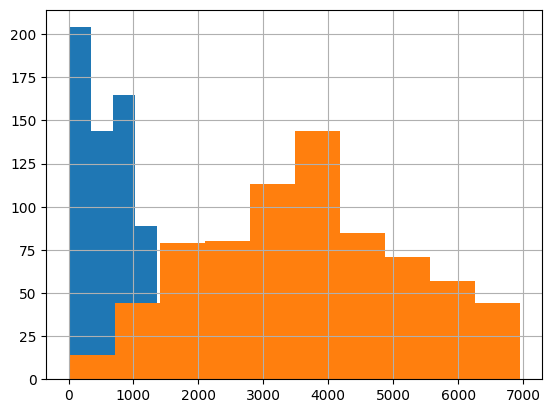

In [173]:
day_df['casual'].hist()
day_df['registered'].hist()

penyewaan didominasi oleh registered. Orang dengan status registered lebih cenderung untuk menyewa sepeda

In [174]:
pivot_RentperHour = hour_df.groupby(by='hour').agg(
                            {
                                'rented': 'mean'
                            }
                        ).reset_index()

In [175]:
print(pivot_RentperHour)

    hour      rented
0      0   53.898072
1      1   33.375691
2      2   22.869930
3      3   11.727403
4      4    6.352941
5      5   19.889819
6      6   76.044138
7      7  212.064649
8      8  359.011004
9      9  219.309491
10    10  173.668501
11    11  208.143054
12    12  253.315934
13    13  253.661180
14    14  240.949246
15    15  251.233196
16    16  311.983562
17    17  461.452055
18    18  425.510989
19    19  311.523352
20    20  226.030220
21    21  172.314560
22    22  131.335165
23    23   87.831044


Nilainya diurutkan berdasarkan rented (banyak sepeda dirental)

Akan dilihat persentase rental pada setiap jamnya dalam range per hari

In [176]:
pivot_RentperHour['percentage'] = pivot_RentperHour['rented']*100/pivot_RentperHour['rented'].sum()

In [177]:
pivot_RentperHour.sort_values(by='rented', ascending=False).reset_index()

,index,hour,rented,percentage
0,17,17,461.452055,10.201228
1,18,18,425.510989,9.406686
2,8,8,359.011004,7.936584
3,16,16,311.983562,6.896958
4,19,19,311.523352,6.886784
5,13,13,253.661180,5.607637
6,12,12,253.315934,5.600004
7,15,15,251.233196,5.553962
8,14,14,240.949246,5.326617
9,20,20,226.030220,4.996805


**Insight:**
- Rental mengalami kenaikan dari 2011 ke 2012 pada setiap bulan, nilai pada tabel improvement adalah banyak perubahannya dalam % dibanding 2011, misal pada bulan Januari rentalnya 135% lebih banyak dari 2011 maka total tersewanya adalah 235% dari tersewa Januari 2011.
- penyewaan untuk perharinya rata-rata adalah sekitar 4000 unit yang didominasi oleh registered. Orang dengan status registered lebih cenderung untuk menyewa sepeda
- Penyewaan sepea paling ramai adalah di jam 17 sampai 18 dengan total 19.6% dari rata-rata total sewa perjam pada setiap harinya.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penyewaan sepeda setiap bulan selama tahun 2011 sampai 2012?

Line chart untuk melihat tren sewa tiap bulan pada 2011 dan 2012

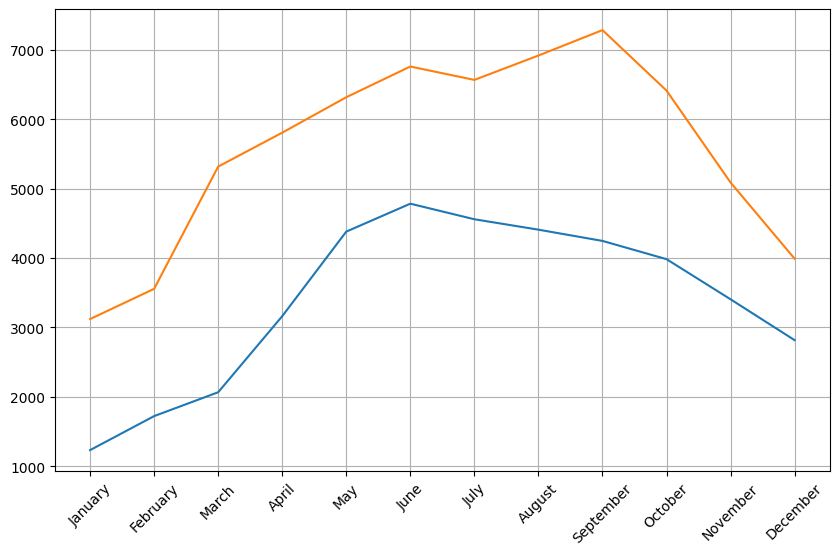

In [178]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10,6))
plt.grid()
plt.xticks(pivot_RentperMonth_2011['month'], month, rotation=45)
plt.plot(pivot_RentperMonth_2011['month'], pivot_RentperMonth_2011['rented'])
plt.plot(pivot_RentperMonth_2012['month'], pivot_RentperMonth_2012['rented'])

- Tren penyewaan sepeda meningkat dari tahun 2011 ke 2012 pada setiap bulannya. Range dari bulan 6 sampai bulan 10 merupakan puncak tertinggi dalam setahun dengan lonjakan terbesar terjadi pada bulan september 2012 dibanding september 2011. Kenaikan paling drastis terjadi antara bulan 3 sampai bulan 5.

### Pertanyaan 2: Bagaimana pengaruh registered dengan rate sewa sepeda?

Bar Chart untuk melihat banyak sewa registered dan tidak registered

In [179]:
pivot_CasualRegistered_melted = pivot_CasualRegistered.melt(id_vars='year', value_vars=['casual', 'registered'],
                    var_name='customers_type', value_name='Rented')
pivot_CasualRegistered_melted=pivot_CasualRegistered_melted.groupby(by=['year','customers_type']).agg(
        {
            'Rented' : 'sum'
        }
).reset_index()


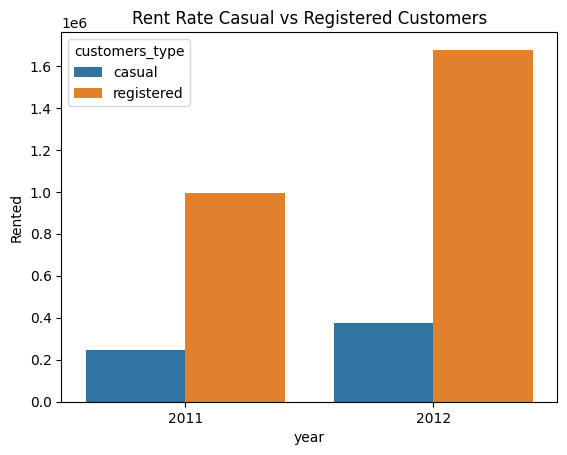

In [180]:
sns.barplot(data=pivot_CasualRegistered_melted,x = 'year', y='Rented', hue='customers_type')
plt.title("Rent Rate Casual vs Registered Customers")
plt.show()

- Orang dengan status registered lebih cenderung untuk menyewa sepeda dibandingkan 'casual' renters.

### Pertanyaan 3: Pada jam berapa umumnya penyewaan sepeda paling banyak?

Akan dibuat bar plot yang menunjukkan banyak sewa per jamnya

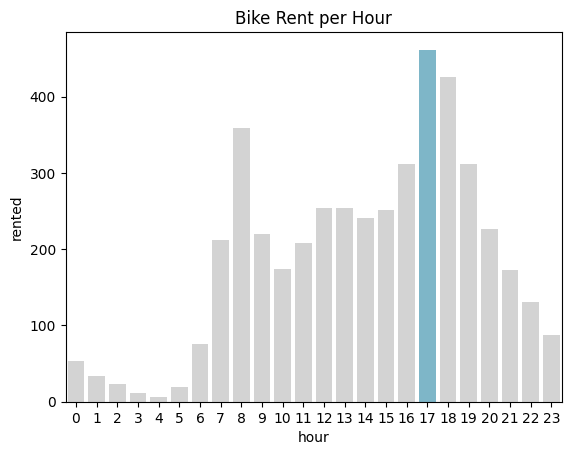

In [181]:
colors = ['#D3D3D3' if value != pivot_RentperHour['rented'].max() else '#72BCD4' for value in pivot_RentperHour['rented']]
sns.barplot(data=pivot_RentperHour,x = 'hour', y='rented', hue='hour', legend=False,palette=colors)
plt.title("Bike Rent per Hour")
plt.show()

- Penyewaan sepeda paling banyak terjadi pada jam 17 dan hampir stabil pada jam 18

### Pertanyaan 4: Pada jam berapa baiknya perawatan harian sepeda dilakukan agar tidak mengganggu pelanggan?

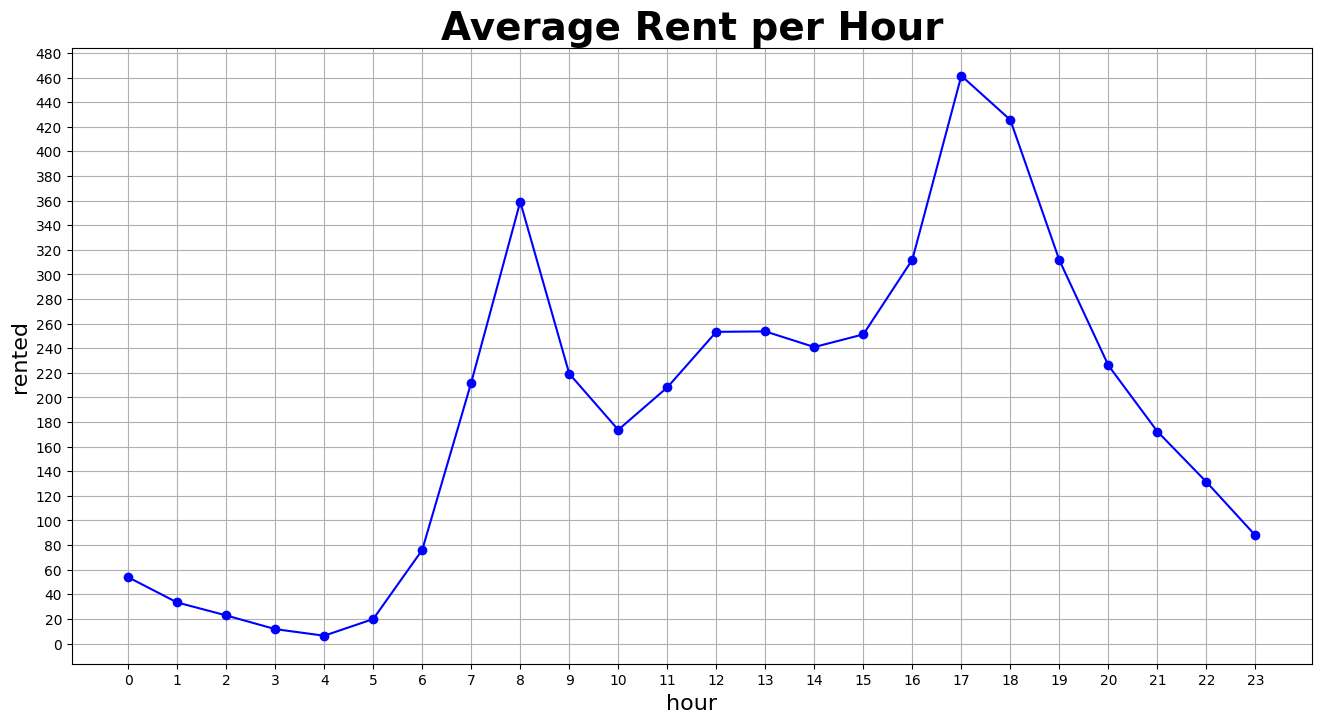

In [182]:


fig, ax = plt.subplots(figsize=(16,8))
ax.plot(
        pivot_RentperHour['hour'],
        pivot_RentperHour['rented'],
        marker = 'o',
        color="blue",

)

ax.set_xlabel('hour',fontsize=16)
ax.set_ylabel('rented',fontsize=16)

ax.set_title("Average Rent per Hour", fontsize=28, fontweight='bold')

ax.set_xticks(pivot_RentperHour['hour'])
ax.set_yticks([x for x in range(0,500,20)])

ax.grid()


**Insight:**
- Tren penyewaan sepeda meningkat dari tahun 2011 ke 2012 pada setiap bulannya. Range dari bulan 6 sampai bulan 10 merupakan puncak tertinggi dalam setahun dengan lonjakan terbesar terjadi pada bulan september 2012 dibanding september 2011. Kenaikan paling drastis terjadi antara bulan 3 sampai bulan 5.
- Orang dengan status registered lebih cenderung untuk menyewa sepeda dibandingkan 'casual' renters.
- Penyewaan sepeda paling banyak terjadi pada jam 17 dan hampir stabil pada jam 18
- Dengan memperhatikan tren, maka jam 4-5 merupakan waktu yang baik untuk maintenance karena demand paling rendah dan akan terjadi lonjakan sewa pada jam 5. Jika terjadi kerusakan yang urgent setelah puncak sewa jam 5-8, dapat dilakukan perbaikan pada jam 10 karena akan segera terjadi kenaikan rate sewa pada jam sebelumnya dan jam 10 rate sewa menurun dibanding sebelumnya.

## Analisis Lanjutan (Opsional)

Akan dilakukan Binning banyak rental untuk melihat kategori paling banyak rental sampai paling sedikit rental

In [183]:
rented_bin_equalRange = pd.cut(day_df['rented'], day_df['rented'].max())
rented_bin_equalRange

0        (984.564, 985.561]
1        (800.031, 801.028]
2       (1348.642, 1349.64]
3      (1561.104, 1562.102]
4      (1599.008, 1600.006]
               ...         
726    (2113.706, 2114.703]
727    (3094.224, 3095.221]
728     (1340.662, 1341.66]
729    (1795.511, 1796.509]
730    (2728.151, 2729.148]
Name: rented, Length: 731, dtype: category
Categories (8714, interval[float64, right]): [(13.308, 22.997] < (22.997, 23.995] < (23.995, 24.992] < (24.992, 25.99] ... (8710.01, 8711.008] < (8711.008, 8712.005] < (8712.005, 8713.003] < (8713.003, 8714.0]]

In [184]:
rented_bin_Desil = pd.qcut(day_df['rented'], q=10)
rented_bin_Desil

0      (21.999, 1746.0]
1      (21.999, 1746.0]
2      (21.999, 1746.0]
3      (21.999, 1746.0]
4      (21.999, 1746.0]
             ...       
726    (1746.0, 2633.0]
727    (2633.0, 3510.0]
728    (21.999, 1746.0]
729    (1746.0, 2633.0]
730    (2633.0, 3510.0]
Name: rented, Length: 731, dtype: category
Categories (10, interval[float64, right]): [(21.999, 1746.0] < (1746.0, 2633.0] < (2633.0, 3510.0] < (3510.0, 4086.0] ... (4968.0, 5531.0] < (5531.0, 6392.0] < (6392.0, 7290.0] < (7290.0, 8714.0]]

Dengan berpatokan pada range di atas, maka kita dapat mengategorikan banyak penyewaan dalam sehari ke dalam 10 kategori.

## Conclusion

- Tren penyewaan sepeda meningkat dari tahun 2011 ke 2012 pada setiap bulannya. Range dari bulan 6 sampai bulan 10 merupakan puncak tertinggi dalam setahun dengan lonjakan terbesar terjadi pada bulan september 2012 dibanding september 2011. Kenaikan paling drastis terjadi antara bulan 3 sampai bulan 5.
- Orang dengan status registered lebih cenderung untuk menyewa sepeda dibandingkan 'casual' renters.
- Penyewaan sepeda paling banyak terjadi pada jam 17 dan hampir stabil pada jam 18
- Dengan memperhatikan tren, maka jam 4-5 merupakan waktu yang baik untuk maintenance karena demand paling rendah dan akan terjadi lonjakan sewa pada jam 5. Jika terjadi kerusakan yang urgent setelah puncak sewa jam 5-8, dapat dilakukan perbaikan pada jam 10 karena akan segera terjadi kenaikan rate sewa pada jam sebelumnya dan jam 10 rate sewa menurun dibanding sebelumnya.

### END OF DOCUMENT